# 05-1 결정 트리
##### 결정 트리 알고리즘을 사용해 새로운 분류 문제를 다루어 봅니다. 결정 트리가 머신러닝 문제를 어떻게 해결하는지 이해합니다.

- 와인캔 판매, 레드 와인과 화이트 와인 표시 누락
- 알코올 도수, 당도, pH 값으로 분류 모델 사용

- 로지스틱 회귀 모델 적용

### 로지스틱 회귀로 와인 분류하기

In [2]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [3]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


- alchole : 알콜, suger : 당도, pH : pH, class : 타깃값(0:레드와인, 1:화이트와인)
- 레드 / 화이트 와인을 맞추는 이진 분류 문제, (화이트 와인이 양성 클래스) : 전체 데이터에서 화이트 와인을 고르는 문제

In [4]:
wine.info()
# df 각 열의 데이터 타입과 누락 데이터가 있는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


- 누락 값이 있을떄 : 데이터를 버리거나 평균값으로 채운 후 사용할 수 있음. 두 가지 방법 다 사용해서 예측값이 높아지는지 확인하는 것이 중요

In [6]:
wine.describe()
# 평균, 표준편차, 최소, 최대값 확인, 중간값, 1사분위, 3사분위 확인

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

- train_test_split() 함수는 설정값을 지정하지 않으면 25%를 테스트 세트로 지정
- 샘플 개수가 충분히 많으므로 20% 정도만 테스트 세트로 나누었습니다. (코드의 test_size=0.2)
- 훈련 세트와 테스트 세트 크기 확인

In [11]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


- 훈련 세트는 5197, 테스트 세트는 1300
- 1. StandardScaler 클래스를 사용해 훈련 세트 전처리 진행
- 2. 같은 객체를 그대로 사용해 테스트 세트를 변환

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

- 이제 표준점수로 변환된 train_scale와 test_scaled를 사용해 로지스틱 회귀 모델을 훈련하겠습니다

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


- 점수가 높지 않음. 훈련 세트와 테스트 세트 점수가 모두 낮으니 모델이 과소적합으로 판단
- 규제 매개변수 C의 값을 바꿔보자. 아니면 solver 매개변수에서 다른 알고리즘을 선택할 수도 있음. 또는 다항 특성을 만들어 추가도 가능

### 설명하기 쉬운 모델과 어려운 모델
- 보고서 만들기 위해 로지스틱 회귀가 학습한 계수와 절편 출력

In [14]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


- 계수값을 학습했는지 이해하기가 쉽지 않음
- 알콜 도수와 당도가 높을수록 화이트 와인일 가능성이 높고, pH가 높을수록 레드 와인일 가능성이 높은 것으로 추정하지만
- 이 숫자가 어떤 의미인지 설명하기 어려움, 다항 특성을 추가한다면 더 어려움
- 대부분 머신러닝 모델은 결과를 설명하기 어려움
- 어려운 설명은 종종 엔지니어를 신뢰하지 않는 결과로 이어짐
- 쉬운 방법으로 설명할 수 있는 모델!? 결정트리

## 결정 트리
- 사이킷런의 DecisionTreeClassifier 클래스 사용해 모델 훈련 

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target)) # 훈련 세트
print(dt.score(test_scaled, test_target)) # 테스트 세트

0.996921300750433
0.8592307692307692


- 훈련 세트에 대한 점수가 엄청 높음 -> 과대적합
- 그림으로 확인해보자

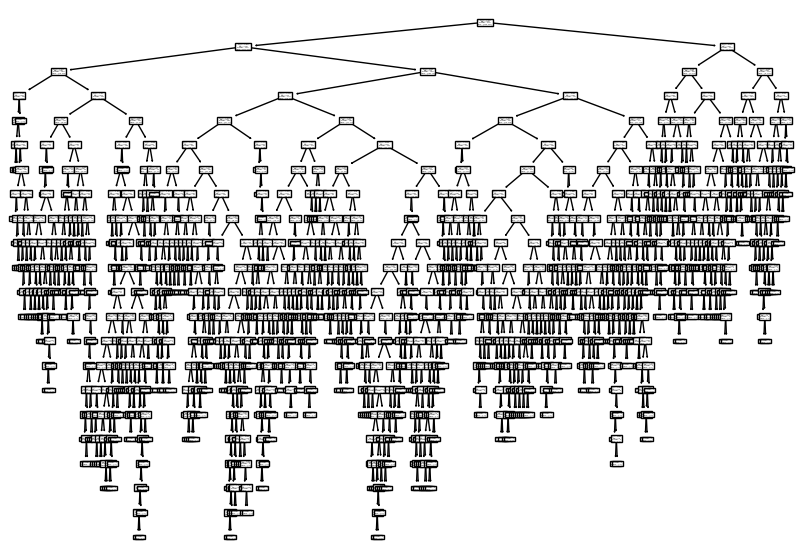

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

- 맨 위의 노드를 루트 노드(root node), 맨 아래의 노드들을 리프 노드(leaf node)라고 함
- 가지(branch)는 테스트의 결과(True, False)라고 함
- 일반적으로 하나의 노드는 2개의 가지를 가짐

- max_depth 매개변수를 1로 주면 루트 노드를 제외하고 하나의 노드를 더 확장하여 그림

[Text(0.5, 0.8333333333333334, 'sugar <= -0.239\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(0.25, 0.5, 'sugar <= -0.802\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'sugar <= 0.204\ngini = 0.069\nsamples = 2275\nvalue = [81, 2194]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

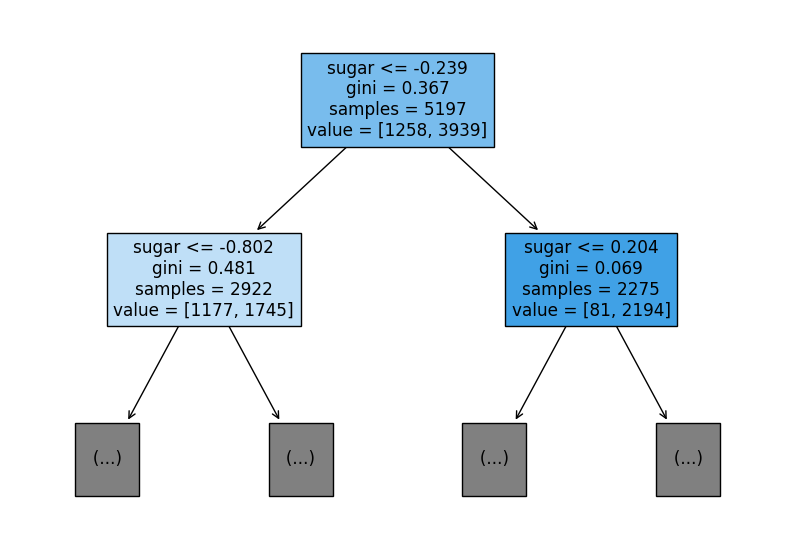

In [10]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

- 루트 노드는 당도가 -0.239인지 질문. 왼쪽이 Yes, 오른쪽이 No
- 루트노드 총 샘플 수(samples)는 5,197개
  - 음성 클래스(레드 와인)은 1,258개
  - 양성 클래스(화이트 와인)은 3,939개
- 왼쪽 노드
  - 당도 -0.802와 같거나 낮다면 왼쪽 가지, 아니면 오른쪽 가지
  - 루트 노드보다 양성 클래스(화이트와인)의 비율이 크게 줄어들음
- 오른쪽 노드
  - 음성 클래스가 81개, 양성 클래스가 2,194개로 대부분이 화이트 와인 샘플이 해당 노드로 이동
  - filled=True 매개변수는 해당 클래스의 비율이 높아지면 점점 진한 색으로 표시됨
- 결정트리에서 리프 노드에서 가장 많은 클래스가 예측 클래스가 됨
- 위의 트리에서 멈춘다면 왼쪽 노드에 도달한 샘플과 오른쪽 노드에 도달한 샘플은 모두 양성 클래스로 예측됨 (두 노드 모두 양성 클래스 개수가 많기 때문)
- 만약 결정 트리를 회귀 문제에 적용하면 리프 노드에 도달한 샘플의 타깃을 평균하여 예측 값으로 사용

### 불순도 
- gini는 지니 불순도(Gini impurity)를 의미함
- DecisionTreeClassifier 클래스의 criterion(표준) 매개변수 기본값이 gini임
- criterion 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것
- 앞의 트리에서 루트 노드는 어떻게 당도 -0.239를 기준으로 왼쪽과 오른쪽 노드로 나누었을까?
  - criterion 매개변수에 지정한 지니 불순도를 사용했기 때문
- 지니 불순도를 어떻게 계산하는지 알아보죠
  - 클래스의 비율을 제곱해서 더한 다음 1에서 빼면 됨
- 지니 불순도 = 1 - (음성 클래스 비율 제곱 + 양성 클래스 비율 제곱)
- 루트 노드의 지니 불순도

$$1 - ((1258 / 1597)^2 + (3939 / 5197)^2) = 0.367$$

- 100개 샘플이 있는 어떤 노드의 두 클래스 비율이 1/2라면 지니 불순도는 0.5로 최악이 됨

$$ 1 - ((50/100)^2 + (50/100)^2) = 0.5 $$

- 노드 하나에 클래스만 있다면 불순도는 0이됨 (순수 노드라고 함)

$$ 1 - ((0/100)^2 + (100/100)^2) = 0 $$

- 결정 트리 모델은 부도 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킴
- 부모 노드와 자식 노드의 불순도 차이를 계산하는 방법
  - 자식 노드의 불순도를 샘플 개수에 비례하여 모두 더함
  - 부모 노드의 불순도에서 빼면 됨
  - 앞의 트리 그림에서 루트 노드를 부모노드, 아래의 노드들이 자식 노드
  - 왼쪽 노드로 2,922개 샘플이 이동, 오른쪽 노드로 2,275개의 샘플이 이동

#### 정보이득(information gain) : 불순도의 차이
- 정보이득 계산
- 부모의 불순도 - (왼쪽 노드의 샘플 수 / 부모의 샘플 수) X (왼쪽 노드 불순도 - (오른쪽 노드 샘플 수 / 부모의 샘플 수) X 오른쪽 노드 불순도

$$ 0.367 - (2922 / 5197) \times 0.481 - (2275 / 5197) \times 0.069 = 0.066 $$

- DecisionTreeClassifier 클래스에서 creterion='entropy'를 지정하여 엔트로피 불순도 사용 가능
- 엔트로피 불순도도 노드의 클래스 비율 사용, 차이점은 제곱이 아니라 밑이 2인 로그를 사용

 - 음성 클래스 비율 x log2 (음성 클래스 비율) - 양성 플래스 비율 x log2(양성 클래스 비율)

$$ -(1258 / 5197) \times log_{2}(1258 / 5197) - (3939 / 5197) \times log_{2}(3939 / 5197) = 0.798 $$

- 기본값인 지니 불순도와 엔트로피 불순도가 만든 결과의 차이는 크지 않음
- 여기서는 기본값인 지니 불순도를 계속 사용

- 불순도 기준을 사용해 정보 이득이 최대가 되도록 노드를 분할
- 노드를 나눌수록 정보이득이 커짐
- 새로운 샘플에 대해 예측할 때에 노드의 질문에 따라 트리를 이동
- 그리고 마지막에 도달한 노드의 클래스 비율을 보고 예측을 만듬

- 앞의 문제에서 트리는 제한 없이 자라났기 때문에 훈련 세트보다 테스트 세트에서 점수가 크게 낮았으니 이를 보완해보자

### 가지치기
- 트리의 최대 깊이를 지정하는 것을 가지치기라고 함
- DecisionTreeClassifier 클래스의 max_depth 매개변수를 3으로 지정해보자

In [11]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


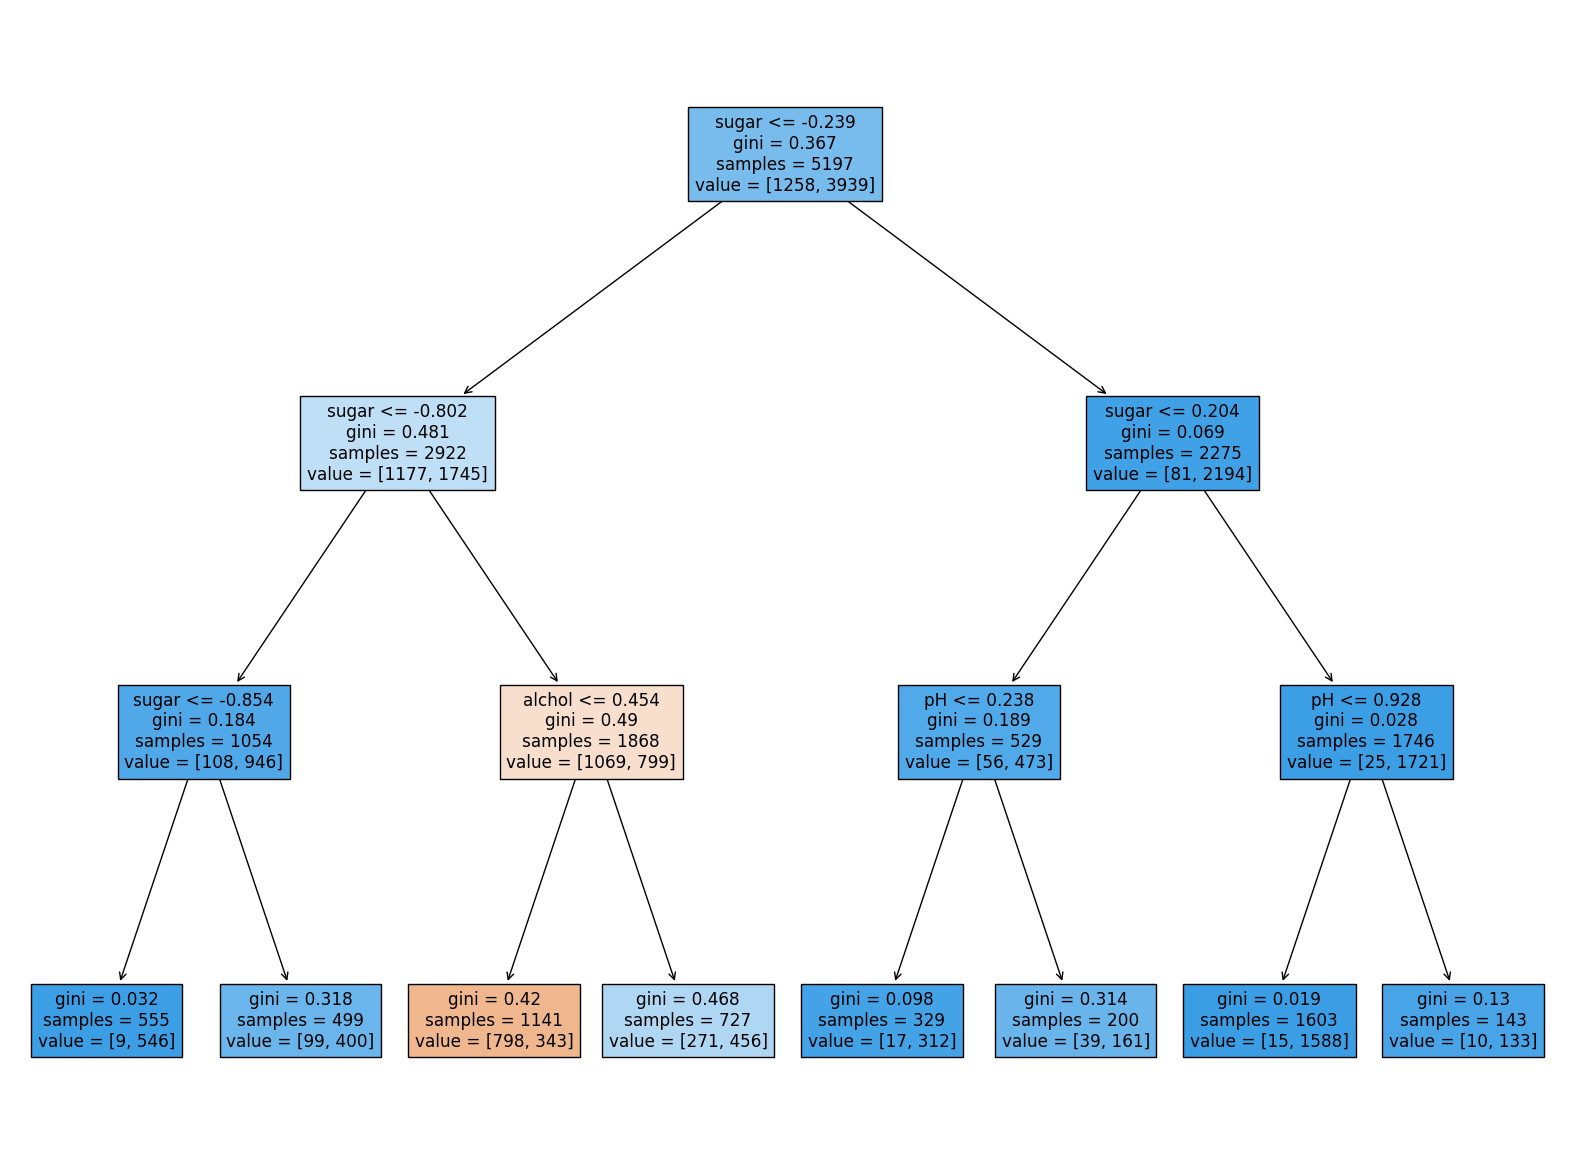

In [12]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alchol', 'sugar', 'pH'])
plt.show()

- 깊이 1의 노드는 모두 당도(suger)를 기준으로 훈련 세트를 나눕니다.
- 깊이 2의 노드는 맨 왼쪽의 노드만 당도를 기준으로 나누고 왼쪽에서 두 번쨰 노드는 알코올 도수(alchol)를 기준으로 나눕니다.
  - 오른쪽 두 노드는 pH를 사용하네요
- 깊이 3의 노드가 최종 노드인 리프 노드입니다. 왼쪽에서 세 번쨰에 있는 노드만 음성 클래스가 더 많습니다.
  - 이 노드에 도착해야만 레드 와인으로 예측합니다.
  - 루트 노드부터 이 노드까지 도달하려면 당도는 -0.239보다 작고 또 -0.802보다 커야합니다.
  - 알코올 도수는 0.454보다 작아야 합니다.
 
- 실습한 내용은 트리의 깊이가 많이 않아서 해석이 쉽습니다. 실전에서는 많은 특성을 사용하고 트리의 깊이도 깊어집니다.
- 불순동는 클래스별 비율을 가지고 계산했죠. 특성값의 스케일은 결정 트리에 아무런 영향을 주지 않으므로 표준화 전처리를 할 필요가 없습니다.

- 훈련 세트(train_input)와 테스트 세트(test_input)로 결정 트리 모델을 다시 훈련해봅니다.

In [13]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


- 결과가 비슷함. 트리를 그려봅니다.

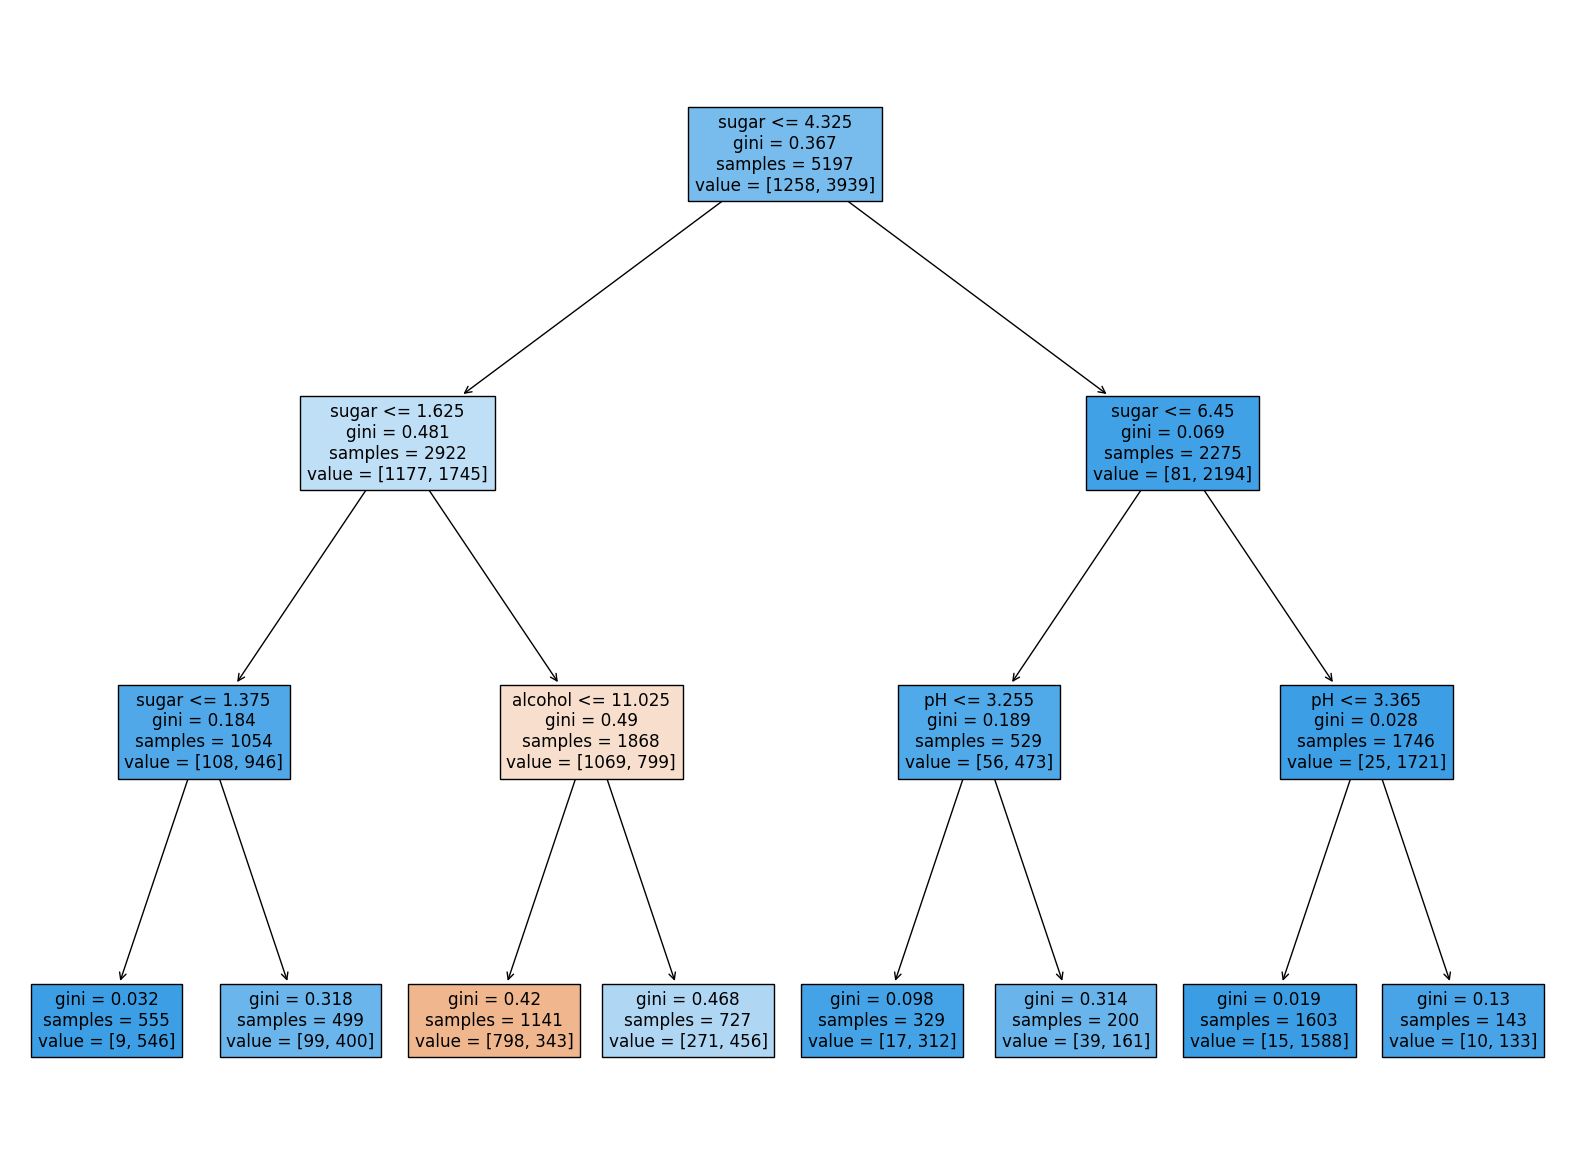

In [14]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

- 특성값을 표준점수로 바꾸지 않아 이해하기 쉬움
- 당도가 1.625보다 크고 4.325보다 작은 와인 중에 알코올 도수가 11.025와 같거나 작은 것이 레드와인

- 결정 트리는 어떤 특성이 가장 유용한지 나타내는 특성 중요도를 계산해 줌

In [15]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


- 두 번째 특성인 당도가 0.87 정도로 특성 중요도가 가장 높음, 그 다음은 알코올 도수, pH 순서
- 이 값들을 모두 더하면 1이 됨
- 특성 중요도는 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산
- 특성 중요도를 활용하면 결정 트리 모델을 특성 선택에 활용 (결정 트리 알고리즘의 또 다른 장점)

- 결정 트리는 많은 앙상블 학습 알고리즘의 기반이 됨
- 앙상블 학습은 신경망과 함께 가장 높은 성능을 내기 때문에 인기가 많은 알고리즘
- 다음 절에서 결정 트리의 다양한 매개변수, 즉 하이퍼파라미터를 자동으로 찾기 위한 방법을 알아보고 그 다음 앙상블 학습을 다루어봄

# 05-2 교차 검증과 그리드 서치
##### 검증 세트가 필요한 이유를 이해하고 교차 검즈에 대해 배웁니다. 그리드 서치와 랜덤 서치를 이용해 최적 성능을 내는 하이퍼파라미터를 찾습니다.

### 검증 세트
- 테스트 세트를 사용하지 않고 과적합을 판단하기 위한 방법은 데이터를 한 번 더 나누는 것
- 이를 검증 세트(validation set)이라고 부름
- 훈련 세트에서 20%를 뗴어 내어 검증 세트로 만듬 (보통 20~30%를 테스트 세트와 검증 세트로 떼어놓음. 하지만 훈련 데이터가 아주 많다면 단 몇 %만 떼어 놓아도 전체 데이터를 대표하는 데 문제가 없음

- 훈련 세트에서 모델을 훈련하고 검증 세트로 모델을 평가
- 테스트 하고 싶은 매개변수를 바꿔가며 가장 좋은 모델을 고름
- 매개변수를 사용해 훈련 세트와 검증 세트를 합쳐 전체 훈련 데이터에서 모델을 다시 훈련
- 마지막에 테스트 세트에서 최종 점수를 평가

In [16]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

- class 열을 타깃으로 사용하고 나머지 열은 특성 배열에 저장

In [17]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

- 훈련 세트와 테스트 세트를 나눌 차례 (방식은 이전과 동일)
- 훈련 세트의 입력 데이터와 타깃 데이터를 train_input과 train_target 배열에 저장

In [18]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

- train_input, train_target을 다시 train_test_split() 함수에 넣어 훈련 세트 sub_input, sub_target과 검증 세트 val_input, val_target을 만들어보자
- 여기서도 test_size 매개변수를 0.2로 지정

In [19]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

- 훈련 세트와 검증 세트의 크기 확인

In [20]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


- sub_input, sub_target과 val_input, val_target을 사용해 모델을 만들고 평가

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


- 모델은 훈련 세트에 과대적합되어 있음
- 매개변수를 바꿔서 더 좋은 모델을 찾아야 함

### 교차 검증
- 안정적인 검증 점수를 얻고 훈련에 더 많은 데이터를 사용 가능함
- 검증 세트를 떼어 내어 평가하는 과정을 여러 번 반복하는 것, 이후 점수를 평균하여 최종 검증 점수를 얻음
- 보통 5-폴드 교차 검증, 10-폴드 교차 검증을 많이 사용
- 각 폴드에서 계산한 검증 점수를 평균하기 때문에 안정된 점수로 생각할 수 있음

- 사이킷런에는 cross_validate()라는 교차 검증 함수가 있음 (cross_val_score() 함수도 있음. test_score 값만 반환)

In [23]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.01033306, 0.00742984, 0.0074861 , 0.00564981, 0.0062089 ]), 'score_time': array([0.00120878, 0.00257301, 0.00124002, 0.00090122, 0.00084424]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


- 위 함수는 fit_time, score_time, test_score 키를 가진 딕셔너리를 반환
- 처음 2개의 키는 각각 모델을 훈련하는 시간과 검증하는 시간을 의미
- 각 키마다 5개의 숫자가 담겨 있습니다.
  - cross_validate() 함수는 기본적으로 5-폴드 교차 검증을 수행
  - cv 매개변수에서 폴드 수를 바꿀 수도 있음
- 훈련과 검증 시간은 코랩에서 리소스를 사용하는 상황에 따라 달라질 수 있으므로 fit_time과 score_time 세트는 출력 결과가 책과 다를 수 있음
- 교차 검증의 최종 점수는 test_score 키에 담긴 5개의 점수를 평균하여 얻을 수 있음
- 이름은 test_score지만 검증 폴드의 점수이니 혼동하지 말 것

In [26]:
import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


- 교차 검증으로 입력 모델에서 얻을 수 있는 최상의 검증 점수를 가늠해볼 수 있음
- 주의할 점
  - cross_validate()는 훈련 세트를 섞어 폴드를 나누지 않음
  - 앞서 train_test_split() 함수로 전체 데이터를 섞은 후 훈련 세트를 준비했기 때문에 따로 섞을 필요가 없음
  - 하지만 교차 검증을 할 때 훈련 세트를 섞으려면 분할기(splitter)를 지정해야 함

- 사이킷런 분할기
  - 교차 검증에서 폴드를 어떻게 나눌지 결정해줌
  - cross_valicate()함수
    - 회귀 모델일 경우 KFlod 분할기를 사용
    - 분류 모델일 경우 StratifiedKFlod 사용 (타깃 클래스를 골고루 나누기 위함

- 앞서 수행항 교차 검증

In [44]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


- 훈련 세트를 섞은 후 10-폴드 교차 검증을 수행하려면 다음과 같이 작성

In [47]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


- KFold 클래스도 동일한 방식으로 사용
- 이어서 결정 트리의 매개변수 값을 바꿔가며 가장 좋은 성능이 나오는 모델을 찾아봅니다.
- 테스트 세트를 사용하지 않고 교차 검증을 통해서 좋은 모델을 골라보자

245 페이지